**We are importing Libraries which we will use in our project

Pandas :-which is used for data cleaning and analysis. Here, Pandas is the best tool for handling this real-world messy data.

Numpy : - NumPy aims to provide an array object that is up to 50x faster than traditional Python lists. It is very useful for fundamental scientific computations in Machine Learning

sklearn : - sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction

The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-case

**

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

We are importing pandas library and acessing dataset with help of pd.read_csv(path) functions from google drive .

In [ ]:
import  pandas as pd
# df = pd.read_csv(r'/content/drive/MyDrive/delhi_jhnvi/Delhi_v2.csv', encoding= 'unicode_escape')
df = pd.read_excel('/content/drive/MyDrive/Chat Bot my/lave/archive (3)/DATA RUMAH.xlsx', sheet_name='Sheet1')


In [ ]:
!pip install --upgrade scikit-learn mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("Shape of Dataset ",df.shape)



Shape of Dataset  (1010, 8)


In [ ]:
df.head(2)

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2


In [ ]:
df.drop(columns=["NO","NAMA RUMAH"],inplace=True)


In [ ]:
df.tail(2)

,HARGA,LB,LT,KT,KM,GRS
1008,19000000000,360,606,7,4,0
1009,10500000000,420,430,7,4,2


In [ ]:
df.dtypes

HARGA    int64
LB       int64
LT       int64
KT       int64
KM       int64
GRS      int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HARGA   1010 non-null   int64
 1   LB      1010 non-null   int64
 2   LT      1010 non-null   int64
 3   KT      1010 non-null   int64
 4   KM      1010 non-null   int64
 5   GRS     1010 non-null   int64
dtypes: int64(6)
memory usage: 47.5 KB


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.ensemble import RandomForestRegressor

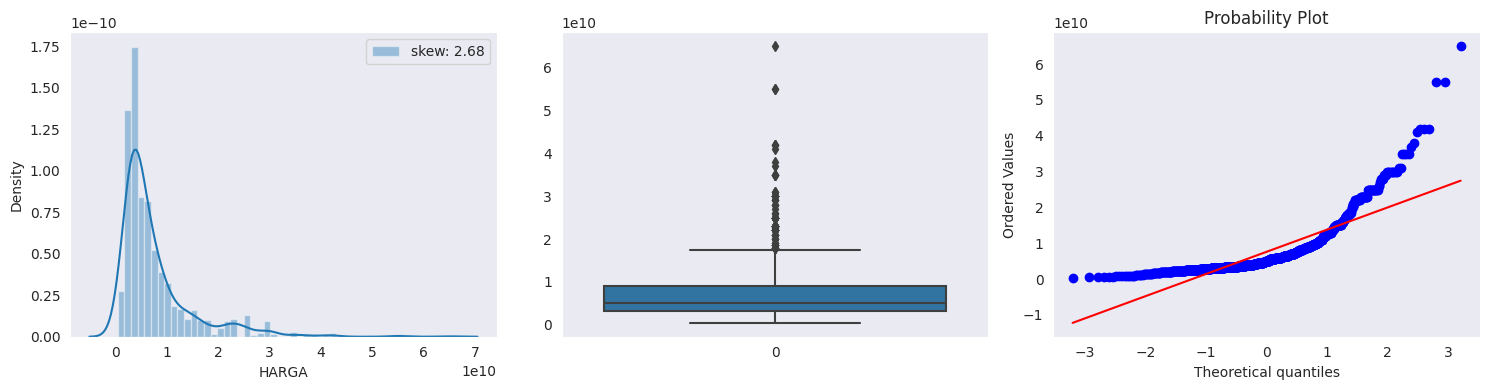

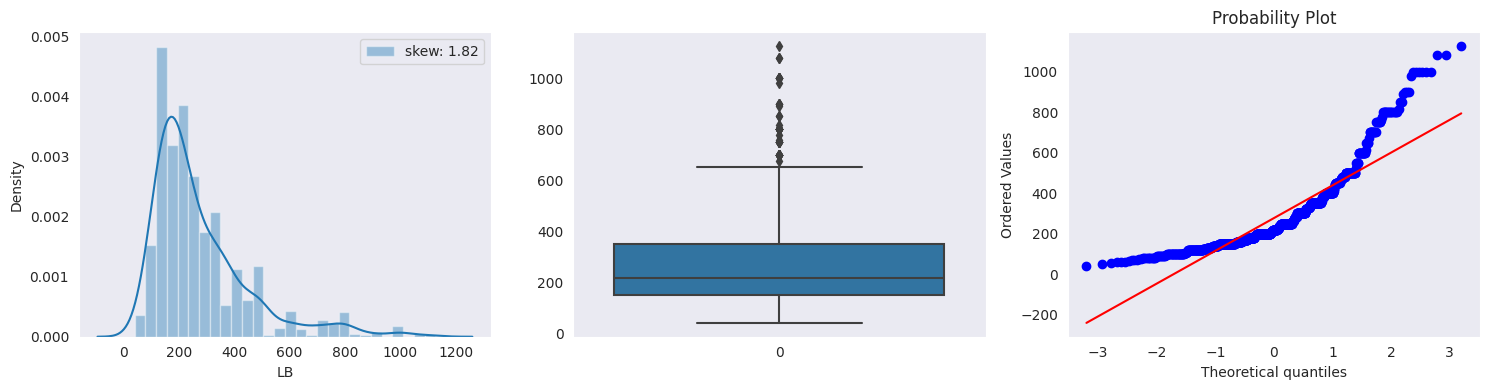

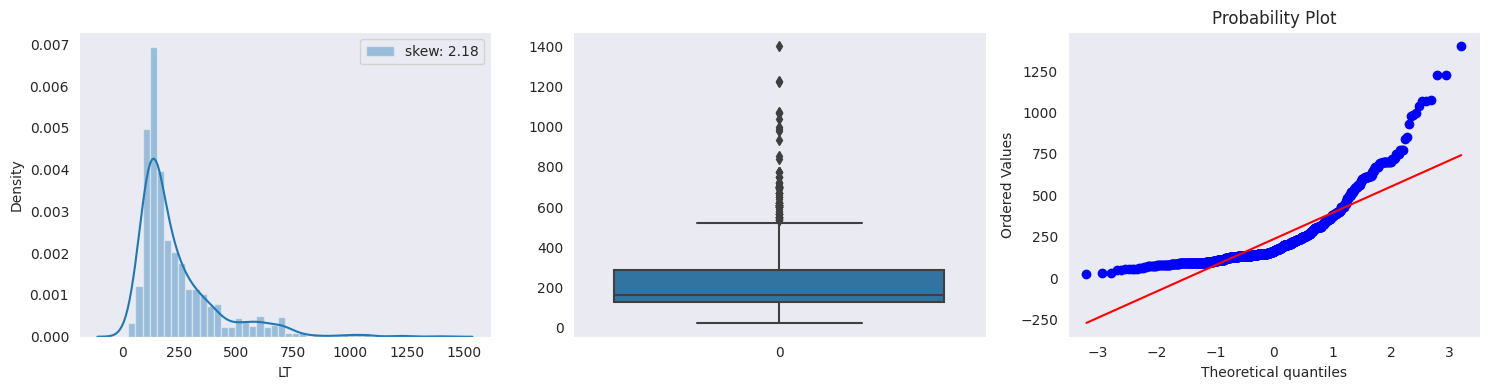

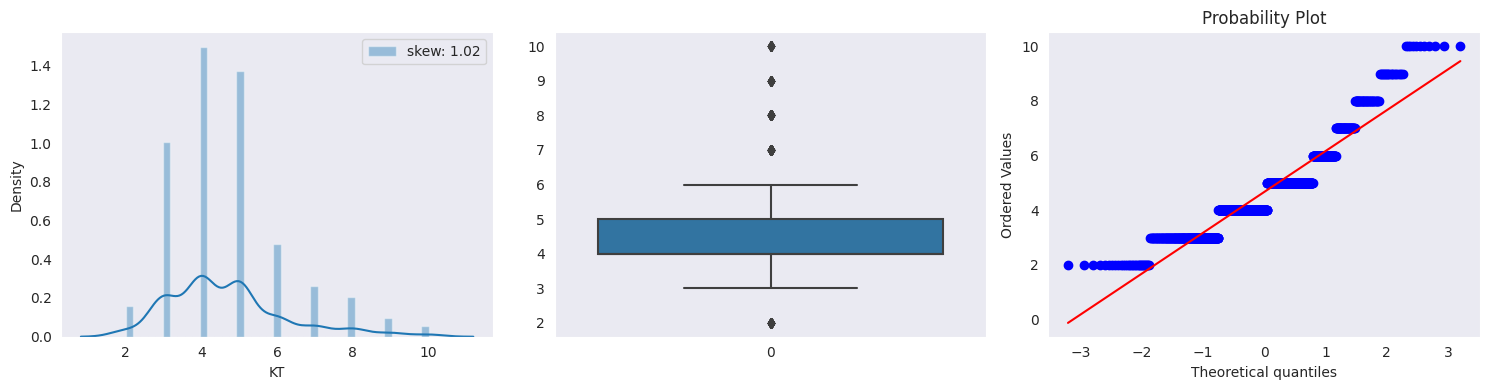

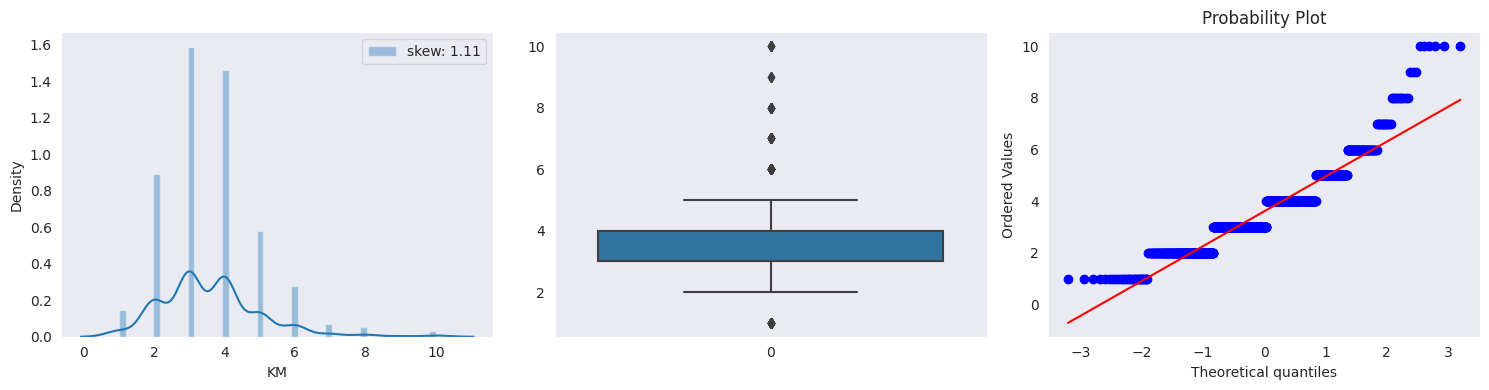

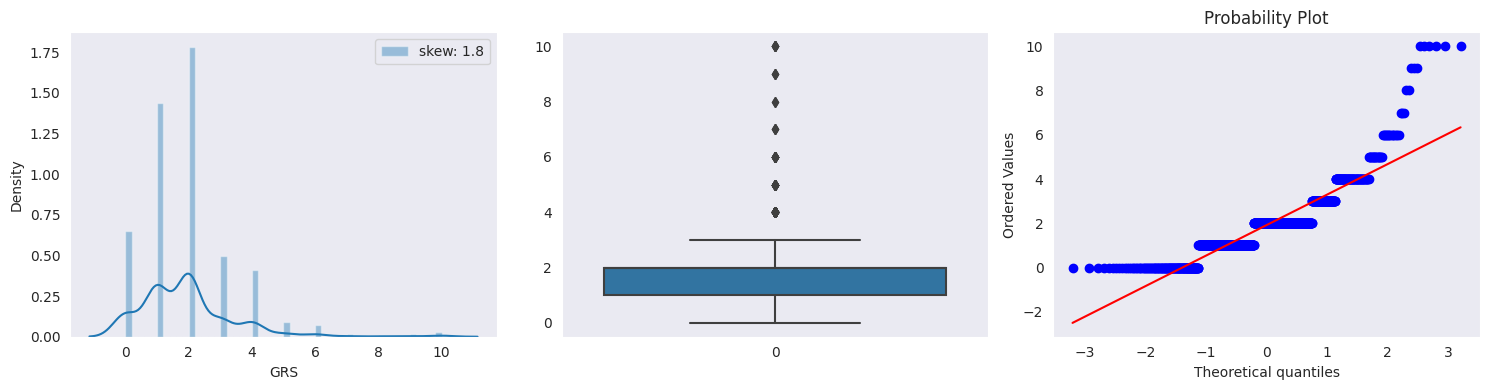

In [ ]:
# import warnings
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter("ignore")
features = df.columns
import seaborn as sns
sns.set_style('dark')
for col in features:
  plt.figure(figsize=(15,4))
  plt.subplot(131)
  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
  plt.legend()
  plt.subplot(132)
  sns.boxplot(df[col])
  plt.subplot(133)
  stats.probplot(df[col],dist="norm", plot=plt)
  plt.tight_layout()
  plt.show()



In [ ]:
def iqr_capping(df, cols, factor):

    for col in cols:
      try:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        df[col] = np.where(
            df[col] > upper_whisker,
            upper_whisker,
            np.where(
        df[col] < lower_whisker,
        lower_whisker,
        df[col]))
      except:
        pass
    return df



df = iqr_capping(df, df.columns[:], 1.5)


In [ ]:
X= df.drop('HARGA',axis=1)
y=np.log(df['HARGA']+1)
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_validation, y_train, y__validation = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [ ]:

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.preprocessing import PowerTransformer,FunctionTransformer,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

import numpy as np
from sklearn.feature_selection import SelectKBest,chi2


pt = PowerTransformer()
scaler = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,5))
])

In [ ]:
pipe = Pipeline([

     ("pt",pt),

    ('scaler',scaler),


])

In [ ]:
from sklearn import metrics
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)

    print('R2 Score', round(r2_square,2))

    print('__________________________________')


In [ ]:
from sklearn.linear_model import LogisticRegression


model_rf = RandomForestRegressor()
model_adaboost = AdaBoostRegressor()
model_lr = LinearRegression()
l = []
models = [("AdaBoostRegressor",model_adaboost),
          ("LinearRegression",model_lr),("RandomForestRegressor",model_rf)
          ]

for name,model in models:
  pipe_f = Pipeline([
      ('trf1',pipe),
      ('model',model),

  ])


  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)
  pipe_f.fit(x_train,y_train)
  y_pred = pipe_f.predict(x_test)
  print("*"*10,name,"*"*10)
  print_evaluate(y_test,y_pred)




********** AdaBoostRegressor **********
R2 Score 0.78
__________________________________
********** LinearRegression **********
R2 Score 0.82
__________________________________
********** RandomForestRegressor **********
R2 Score 0.83
__________________________________


In [ ]:
# export
import pickle
final = Pipeline([
    ('pipe',pipe),

    ('model',model_rf),

])
pickle.dump(final,open('pipe.pkl','wb'))

In [ ]:
df.head(1)

,HARGA,LB,LT,KT,KM,GRS
0,3.800000e+09,220.0,220.0,3.0,3.0,0.0


KeyboardInterrupt: ignored

In [ ]:
np.exp(final.predict([df.head(1).values[0][1:]]))[0]

4176152036.118486

**Feature Selection**

1.Filter based


2.Wrapper Based


   .Exhaustive    Backward Elimination        Forward Selection

In [ ]:
x_train.shape

(808, 2)

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)


lr = LinearRegression()
efs = ExhaustiveFeatureSelector(lr, max_features=3, scoring='r2', cv=5)
efs = efs.fit(x_train, y_train)

selected_features = x_train.columns[list(efs.best_idx_)]
selected_features

Features: 25/25

Index(['LT', 'KM', 'GRS'], dtype='object')

In [ ]:
X_efs = X[selected_features]

In [ ]:
from sklearn.linear_model import LogisticRegression


model_rf = RandomForestRegressor()
model_adaboost = AdaBoostRegressor()
model_lr = LinearRegression()
l = []
models = [("AdaBoostRegressor",model_adaboost),
          ("LinearRegression",model_lr),("RandomForestRegressor",model_rf)
          ]

for name,model in models:
  pipe_f = Pipeline([
      ('trf1',pipe),
      ('model',model),

  ])


  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(X_efs,y, random_state = 42, test_size = 0.2)
  pipe_f.fit(x_train,y_train)
  y_pred = pipe_f.predict(x_test)
  print("*"*10,name,"*"*10)
  print_evaluate(y_test,y_pred)




********** AdaBoostRegressor **********
R2 Score 0.76
__________________________________
********** LinearRegression **********
R2 Score 0.79
__________________________________
********** RandomForestRegressor **********
R2 Score 0.81
__________________________________


In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = RandomForestRegressor()

sel = EFS(lr,  scoring='r2', cv=5 ,print_progress=True,n_jobs=-1)
model = sel.fit(x_train,y_train)

Features: 7/7

In [ ]:
model.best_score_,model.best_feature_names_

(0.7882616787038303, ('LT', 'KM', 'GRS'))

In [ ]:
# detailed output
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.69674642, 0.73936015, 0.71359193, 0.70233575, 0.72062763]),
  'avg_score': 0.7145323760839806,
  'feature_names': ('LT',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.31257832, 0.29952436, 0.32283015, 0.44792241, 0.20990455]),
  'avg_score': 0.3185519581828431,
  'feature_names': ('KM',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.20417439, 0.33630567, 0.26120367, 0.37275776, 0.20635976]),
  'avg_score': 0.27616024932424466,
  'feature_names': ('GRS',)}}

In [ ]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.696746424124929, 0.7393601483806334, 0.7135...",0.714532,"(LT,)",0.019233,0.014964,0.007482
1,"(1,)","[0.31257831592409324, 0.29952435732085736, 0.3...",0.318552,"(KM,)",0.097812,0.076101,0.038051
2,"(2,)","[0.20417438556711665, 0.33630566918543203, 0.2...",0.27616,"(GRS,)",0.087601,0.068156,0.034078


Back Ward Elimination

In [ ]:
# baseline model
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()


print("training",np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test, y_test, cv=5, scoring='r2')))

training 0.739043454852615
testing 0.7533276363781681


In [ ]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef